# **Import Library**

In [94]:
from nltk.corpus import stopwords # Daftar kata-kata berhenti dalam teks
from nltk.stem import PorterStemmer # Stemmer yang digunakan adalah Porter Stemmer.
from nltk.tokenize import word_tokenize # Tokenisasi teks
from sklearn.ensemble import RandomForestClassifier # Algoritma Random Forest untuk klasifikasi
from sklearn.feature_extraction.text import TfidfVectorizer # Konversi teks menjadi vektor TF-IDF
from sklearn.linear_model import LogisticRegression # Algoritma Logistic Regression untuk klasifikasi
from sklearn.metrics import accuracy_score # Metrik akurasi
from sklearn.model_selection import train_test_split # Membagi data menjadi set pelatihan dan pengujian
from sklearn.naive_bayes import BernoulliNB # Algoritma Naive Bayes untuk klasifikasi
from sklearn.tree import DecisionTreeClassifier # Algoritma Decision Tree untuk klasifikasi
from textblob import TextBlob # Pustaka untuk pemrosesan bahasa alami
from wordcloud import WordCloud # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import matplotlib.pyplot as plt # Matplotlib untuk visualisasi data
import nltk # Import pustaka NLTK (Natural Language Toolkit).
import numpy as np # NumPy untuk komputasi numerik
import pandas as pd # Pandas untuk manipulasi dan analisis data
import re # Modul untuk bekerja dengan ekspresi reguler
import seaborn as sns # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import string # Berisi konstanta string, seperti tanda baca
np.random.seed(0) # Mengatur seed untuk reproduktibilitas
pd.options.mode.chained_assignment = None # Menonaktifkan peringatan chaining

In [95]:
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /home/bima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset

In [99]:
# Membaca dataset ulasan aplikasi 8 Ball Pool
app_reviews_df = pd.read_csv('ulasan_aplikasi_8ballpool.csv')
app_reviews_df = app_reviews_df[['content']]

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

print("Jumlah baris:", jumlah_ulasan)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 94500
Jumlah kolom: 1


In [100]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,content
0,Game is very fun and helps you learn about pla...
1,"Would rate it higher, but the physics in this ..."
2,This game is straight up fixed. Insane English...
3,After playing for years now it's time to updat...
4,"The game is fun and addicting, but also extrem..."


In [101]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94500 entries, 0 to 94499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  94500 non-null  object
dtypes: object(1)
memory usage: 738.4+ KB


In [102]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [103]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94500 entries, 0 to 94499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  94500 non-null  object
dtypes: object(1)
memory usage: 738.4+ KB


In [104]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

print("Jumlah baris sebelum menghapus duplikat:", jumlah_ulasan)
print("Jumlah baris setelah menghapus duplikat:", jumlah_ulasan_setelah_hapus_duplikat)

Jumlah baris sebelum menghapus duplikat: 94500
Jumlah baris setelah menghapus duplikat: 93585


## Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [105]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    stemmer = PorterStemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text]

    return stemmed_words

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [106]:
%%time
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Stemming teks dan menyimpannya di 'text_stemmingText'
clean_df['text_stemmingText'] = clean_df['text_stopword'].apply(stemmingText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stemmingText'].apply(toSentence)

CPU times: user 46.3 s, sys: 1.73 s, total: 48 s
Wall time: 48.2 s


In [77]:
clean_df.head(5)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...
2,This game is straight up fixed. Insane English...,This game is straight up fixed Insane English ...,this game is straight up fixed insane english ...,"[this, game, is, straight, up, fixed, insane, ...","[game, straight, fixed, insane, english, didnt...","[game, straight, fix, insan, english, didnt, s...",game straight fix insan english didnt set appl...
3,After playing for years now it's time to updat...,After playing for years now its time to update...,after playing for years now its time to update...,"[after, playing, for, years, now, its, time, t...","[playing, years, time, update, review, game, a...","[play, year, time, updat, review, game, addict...",play year time updat review game addict amount...
4,"The game is fun and addicting, but also extrem...",The game is fun and addicting but also extreme...,the game is fun and addicting but also extreme...,"[the, game, is, fun, and, addicting, but, also...","[game, fun, addicting, also, extremely, frustr...","[game, fun, addict, also, extrem, frustrat, am...",game fun addict also extrem frustrat amount sl...


## Labelling

In [107]:
clean_df.head(2)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...


In [108]:
%%time
clean_df['polarity'] = clean_df['text_akhir'].apply(lambda x: TextBlob(x).sentiment.polarity)
clean_df.head(2)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...,-0.012245


In [109]:
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'

clean_df['label'] = clean_df['polarity'].apply(polarity_to_label)
clean_df.head(2)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity,label
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889,pos
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...,-0.012245,neg


In [110]:
clean_df['label'].value_counts()

label
neg        42812
pos        42449
neutral     8324
Name: count, dtype: int64

## Imbalance Data Handling

In [125]:
clean_df.value_counts('label')

label
neg        42812
pos        42449
neutral     8324
Name: count, dtype: int64

In [166]:
# Pisahkan DataFrame berdasarkan kategori label
positive_df = clean_df[clean_df['label'] == 'pos'].iloc[:8000]
neutral_df = clean_df[clean_df['label'] == 'neutral'].iloc[:8000]
negative_df = clean_df[clean_df['label'] == 'neg'].iloc[:8000]

print(positive_df.shape)
print(neutral_df.shape)
print(negative_df.shape)

(8000, 10)
(8000, 10)
(8000, 10)


In [170]:
# Gabungkan kembali DataFrame
balanced_df = pd.concat([positive_df, neutral_df, negative_df])

# Reset index DataFrame
balanced_df = balanced_df.reset_index(drop=True)

# Display the balanced DataFrame
balanced_df.head()

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity,label,text_length
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889,pos,42
1,This game is straight up fixed. Insane English...,This game is straight up fixed Insane English ...,this game is straight up fixed insane english ...,"[this, game, is, straight, up, fixed, insane, ...","[game, straight, fixed, insane, english, didnt...","[game, straight, fix, insan, english, didnt, s...",game straight fix insan english didnt set appl...,0.020000,pos,41
2,"Once you get above Silver League, it's almost ...",Once you get above Silver League its almost im...,once you get above silver league its almost im...,"[once, you, get, above, silver, league, its, a...","[get, silver, league, almost, impossible, win,...","[get, silver, leagu, almost, imposs, win, game...",get silver leagu almost imposs win game row wi...,0.100000,pos,50
3,So. Much. Fun! So much more than just pool. Th...,So Much Fun So much more than just pool Theres...,so much fun so much more than just pool theres...,"[so, much, fun, so, much, more, than, just, po...","[much, fun, much, pool, theres, items, collect...","[much, fun, much, pool, there, item, collect, ...",much fun much pool there item collect upgrad l...,0.248485,pos,43
4,It's pretty good if you consistently pay for p...,Its pretty good if you consistently pay for pa...,its pretty good if you consistently pay for pa...,"[its, pretty, good, if, you, consistently, pay...","[pretty, good, consistently, pay, pass, dont, ...","[pretti, good, consist, pay, pass, dont, good,...",pretti good consist pay pass dont good luck ge...,0.286429,pos,37


## Visualization

### Class Distribution Pie Chart

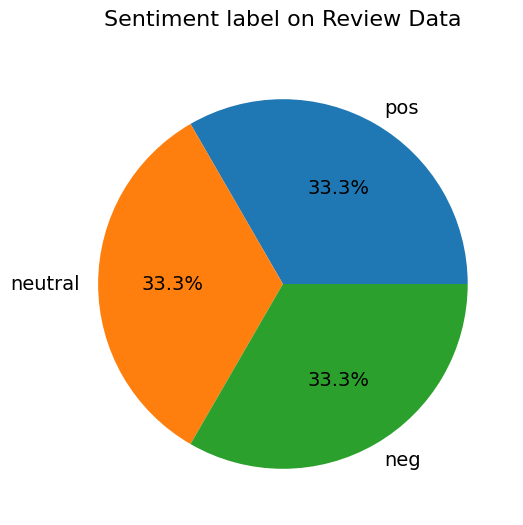

In [203]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'balanced_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in balanced_df['label'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'balanced_df' dan menyimpannya dalam list 'labels'.
labels = list(balanced_df['label'].value_counts().index)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment label on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

### Class Distribution Bar Chart

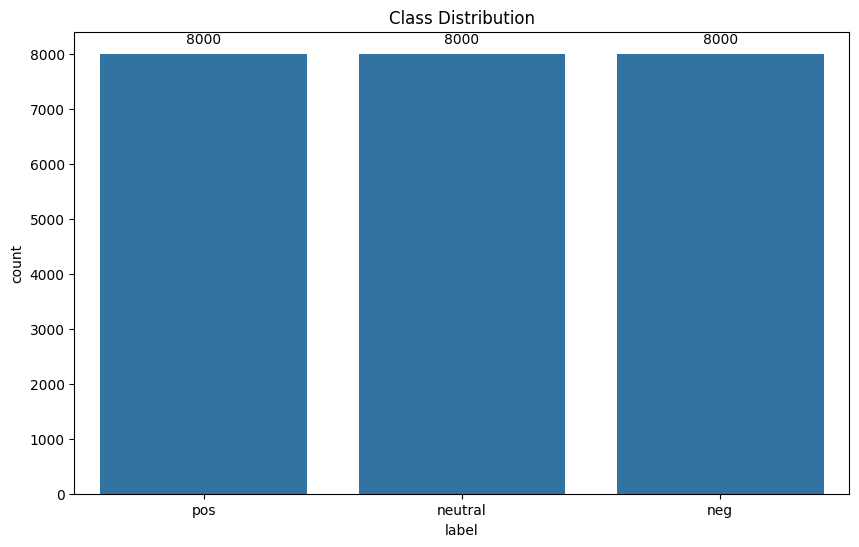

CPU times: user 163 ms, sys: 3.84 ms, total: 167 ms
Wall time: 191 ms


In [204]:
%%time
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='label', data=balanced_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.show()

### Text Length Distribution

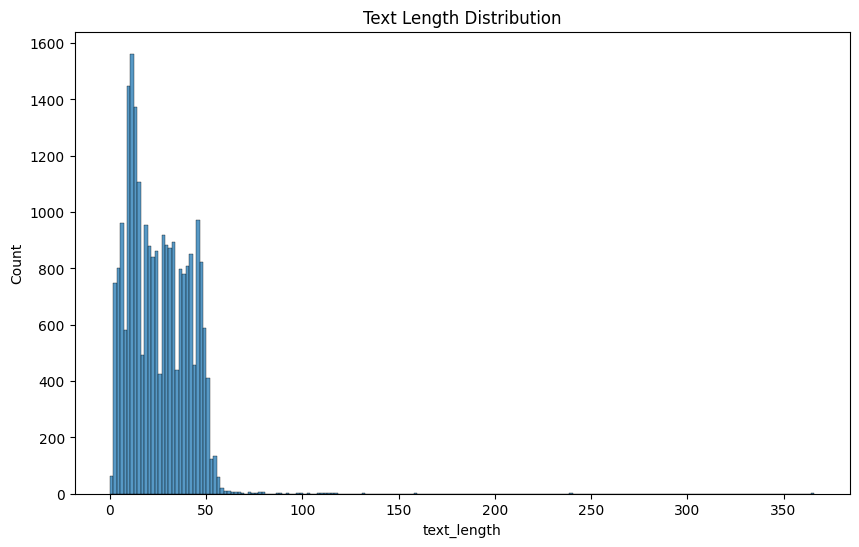

CPU times: user 368 ms, sys: 5.75 ms, total: 374 ms
Wall time: 414 ms


In [205]:
%%time
# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
balanced_df['text_length'] = balanced_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(balanced_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

### Most Frequent Words

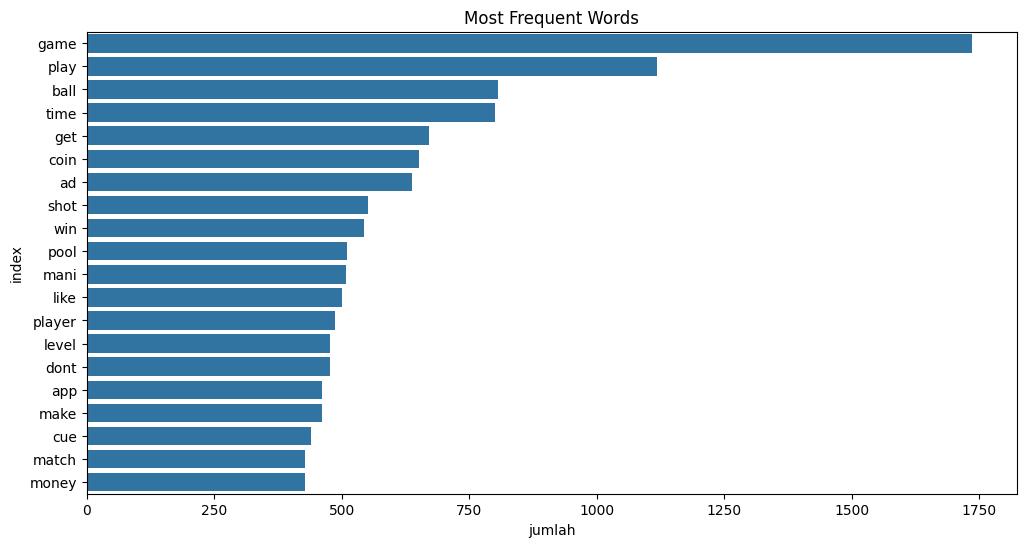

CPU times: user 1.91 s, sys: 1.37 s, total: 3.28 s
Wall time: 3.39 s


In [206]:
%%time
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(balanced_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

### Word Cloud of Positive Review Data

In [197]:
# Membuat DataFrame baru 'positive_reviews' yang hanya berisi tweet dengan polaritas positif.
positive_reviews = balanced_df[balanced_df['label'] == 'pos']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_reviews'.
positive_reviews = positive_reviews[['text_akhir', 'label','text_stopword']]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_reviews = positive_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_reviews.index += 1

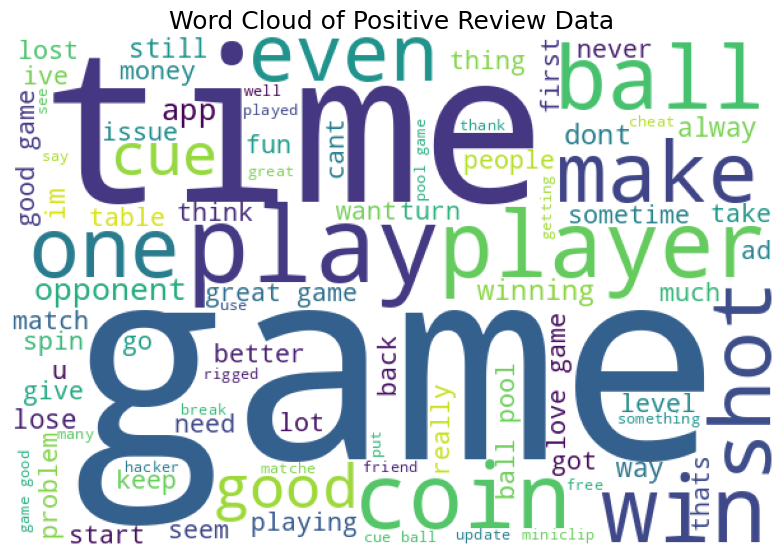

CPU times: user 26.3 s, sys: 118 ms, total: 26.5 s
Wall time: 27.4 s


In [198]:
%%time
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_reviews'.
for tweet in positive_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

### Word Cloud of Neutral Review Data

In [199]:
# Membuat DataFrame baru 'neutral_reviews' yang hanya berisi tweet dengan polaritas positif.
neutral_reviews = balanced_df[balanced_df['label'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_reviews'.
neutral_reviews = neutral_reviews[['text_akhir', 'label','text_stopword']]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_reviews = neutral_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_reviews.index += 1

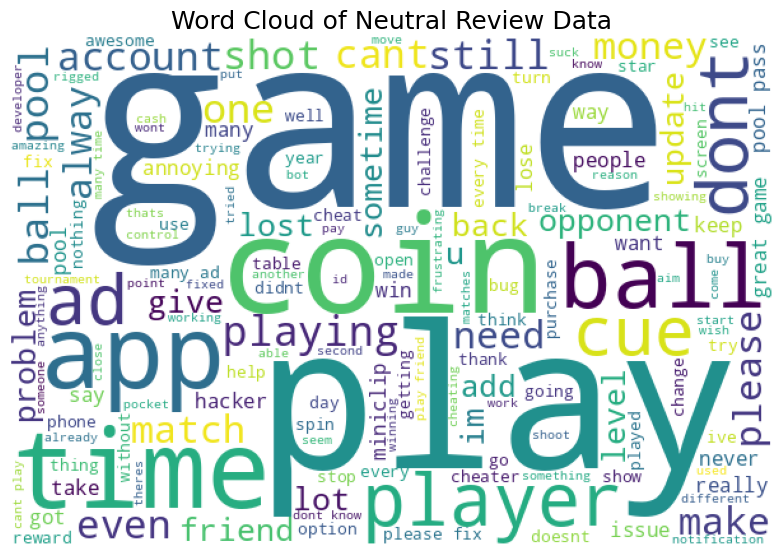

CPU times: user 8.32 s, sys: 88.5 ms, total: 8.41 s
Wall time: 8.94 s


In [200]:
%%time
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_reviews'.
for tweet in neutral_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

### Word Cloud of Negative Review Data

In [201]:
# Membuat DataFrame baru 'negative_reviews' yang hanya berisi tweet dengan polaritas negatif.
negative_reviews = balanced_df[balanced_df['label'] == 'neg']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_reviews'.
negative_reviews = negative_reviews[['text_akhir', 'label','text_stopword']]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_reviews = negative_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_reviews.index += 1

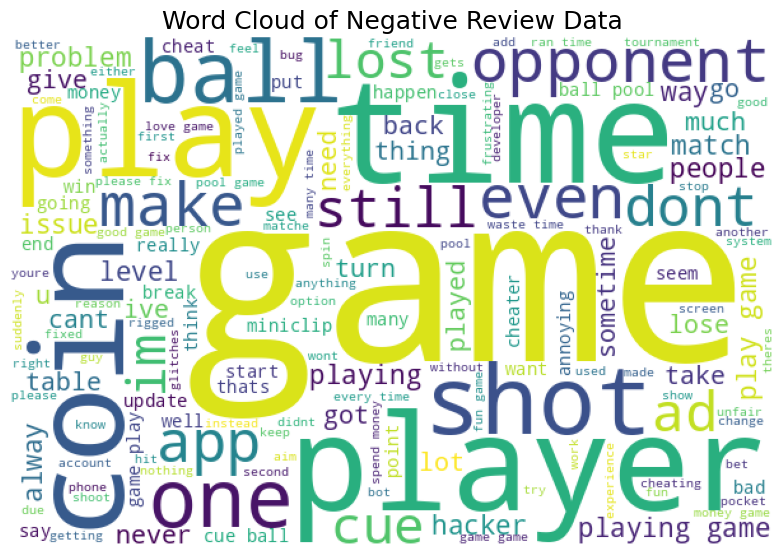

CPU times: user 29.6 s, sys: 125 ms, total: 29.8 s
Wall time: 30.8 s


In [202]:
%%time
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_reviews'.
for tweet in negative_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **Feature Extraction**

In [171]:
balanced_df.head(1)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity,label,text_length
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889,pos,42


In [172]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = balanced_df['text_akhir']
y = balanced_df['label']

### TF-IDF

In [173]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer()
# tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [174]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aa,aaa,aaaaa,aaaaaaaand,aaaaaargh,aaaaand,aaaahaaaa,aaaand,aaaargh,aaand,...,𝚜𝚞𝚙𝚎𝚛𝚌𝚘𝚗𝚎𝚌𝚝𝚎𝚍,𝚝𝚑𝚊𝚝𝚜,𝚝𝚑𝚎,𝚝𝚑𝚒𝚜,𝚝𝚘,𝚠𝚊𝚜,𝚠𝚑𝚒𝚕𝚎,𝚠𝚒𝚕𝚕,𝚢𝚘𝚞,𝚢𝚘𝚞𝚛
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Data Splitting**

In [175]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.7, random_state=42)

# Menampilkan dimensi data latih dan data uji
print("Dimensi data latih:", X_train.shape, y_train.shape)
print("Dimensi data uji:", X_test.shape, y_test.shape)

Dimensi data latih: (7200, 16407) (7200,)
Dimensi data uji: (16800, 16407) (16800,)


# Machine Learning

## **Naive Bayes**

In [176]:
%%time
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8234722222222223
Naive Bayes - accuracy_test: 0.7181547619047619
CPU times: user 4.8 s, sys: 2.11 s, total: 6.91 s
Wall time: 5.43 s


## **Random Forest**

In [177]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8014880952380953


## **Logistic Regression**

In [178]:
%%time
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9293055555555556
Logistic Regression - accuracy_test: 0.8527976190476191
CPU times: user 59.3 s, sys: 1.74 s, total: 1min 1s
Wall time: 19.5 s


## **Decision Tree**

In [179]:
%%time
# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.8198809523809524
CPU times: user 11.3 s, sys: 1.82 s, total: 13.1 s
Wall time: 13.2 s


## Accuracy Comparison

In [180]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.718155
1        Random Forest       0.801488
2  Logistic Regression       0.852798
3        Decision Tree       0.819881


In [181]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                 Model  Accuracy Test
2  Logistic Regression       0.852798
3        Decision Tree       0.819881
1        Random Forest       0.801488
0          Naive Bayes       0.718155


Dalam kasus Sentiment Analysis ini, algoritma Naive Bayes mencapai akurasi tertinggi sebesar 87,27%. Oleh karena itu, algoritma Naive Bayes dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

## Review Prediction

In [242]:
def review_predict(text):
  # Melakukan preprocessing pada kalimat baru
  kalimat_baru_cleaned = cleaningText(text)
  kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
  kalimat_baru_tokenized = tokenizingText(kalimat_baru_casefolded)
  kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
  kalimat_baru_stemmed = stemmingText(kalimat_baru_filtered)
  kalimat_baru_final = toSentence(kalimat_baru_stemmed)

  # Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
  X_kalimat_baru = tfidf.transform([kalimat_baru_final])

  # Memperoleh prediksi sentimen kalimat baru
  prediksi_sentimen_naive_bayes = naive_bayes.predict(X_kalimat_baru)
  prediksi_sentimen_random_forest = random_forest.predict(X_kalimat_baru)
  prediksi_sentimen_logistic_regression = logistic_regression.predict(X_kalimat_baru)
  prediksi_sentimen_decision_tree = decision_tree.predict(X_kalimat_baru)

  # Menampilkan hasil prediksi
  if prediksi_sentimen_naive_bayes == 'pos':
    print('Naive Bayes: Kalimat positif')
  elif prediksi_sentimen_naive_bayes == 'neg':
    print('Naive Bayes: Kalimat negatif')
  else:
    print('Naive Bayes: Kalimat neutral')

  if prediksi_sentimen_random_forest == 'pos':
    print('Random Forest: Kalimat positif')
  elif prediksi_sentimen_random_forest == 'neg':
    print('Random Forest: Kalimat negatif')
  else:
    print('Random Forest: Kalimat neutral')

  if prediksi_sentimen_logistic_regression == 'pos':
    print('Logistic Regression: Kalimat positif')
  elif prediksi_sentimen_logistic_regression == 'neg':
    print('Logistic Regression: Kalimat negatif')
  else:
    print('Logistic Regression: Kalimat neutral')

  if prediksi_sentimen_decision_tree == 'pos':
    print('Decision Tree: Kalimat positif')
  elif prediksi_sentimen_decision_tree == 'neg':
    print('Decision Tree: Kalimat negatif')
  else:
    print('Decision Tree: Kalimat neutral')

In [243]:
kalimat_baru = '''One of the worst games I have ever played. It's like it's not even trying to hide the fact you play against AI. How I know this is that they always go for solids, never stripes, and when aiming have quick and spontaneous movements. Even when stripes has an easier ball to hit they still go for solids and 9 times out of 10 they don't have a profile picture. Another thing is after doing a spin in puts up the premium spin, I don't want or care about the premium spin so stop bringing it up.'''
review_predict(kalimat_baru)

Naive Bayes: Kalimat negatif
Random Forest: Kalimat negatif
Logistic Regression: Kalimat negatif
Decision Tree: Kalimat negatif
